In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [7]:
dataset = pd.read_csv("./train.csv")
X = dataset.drop(['label'], axis=1).values
y = dataset['label'].values
dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
import warnings
warnings.filterwarnings("ignore")

parameters = {'C': [.001, .01, .1, 1, 10, 100]}

grid = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, cv=4, verbose=2, return_train_score=True)
grid.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV] END ............................................C=0.001; total time=  11.4s
[CV] END ............................................C=0.001; total time=  11.7s
[CV] END ............................................C=0.001; total time=  11.5s
[CV] END ............................................C=0.001; total time=  15.1s
[CV] END .............................................C=0.01; total time=   9.9s
[CV] END .............................................C=0.01; total time=   9.7s
[CV] END .............................................C=0.01; total time=   9.8s
[CV] END .............................................C=0.01; total time=   9.6s
[CV] END ..............................................C=0.1; total time=   9.7s
[CV] END ..............................................C=0.1; total time=   9.6s
[CV] END ..............................................C=0.1; total time=   9.4s
[CV] END ........................................

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True, verbose=2)

In [13]:
grid.cv_results_

{'mean_fit_time': array([12.47271502,  9.81256151,  9.6483801 ,  9.69212663,  9.49873281,
         9.59169298]),
 'std_fit_time': array([1.58217727, 0.13810486, 0.10798535, 0.15484578, 0.09669219,
        0.05857961]),
 'mean_score_time': array([0.03489959, 0.02898633, 0.02822733, 0.02880573, 0.02705884,
        0.0275991 ]),
 'std_score_time': array([0.00275724, 0.00388277, 0.0005116 , 0.00140212, 0.00077676,
        0.00078495]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.9125    , 0.92202381, 0.915     , 0.90154762, 0.89547619,
        0.89559524]),
 'split1_test_score': array([0.90797619, 0.91642857, 0.90928571, 0.89738095, 0.89261905,
        0.89011905]),
 'split2_test_score': array([0.91083333, 0.91964286, 0.91404762, 0.899

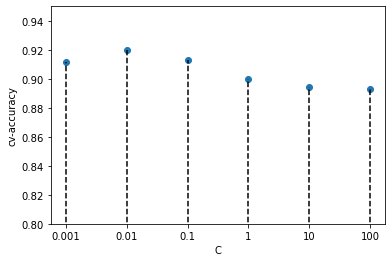

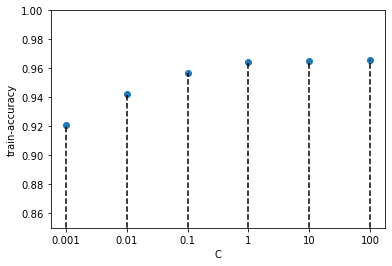

In [14]:
C_vals = [str(x) for x in parameters['C']]

plt.xlabel("C")
plt.ylabel("cv-accuracy")
plt.scatter(C_vals, grid.cv_results_['mean_test_score'])
plt.vlines(C_vals, 0, grid.cv_results_['mean_test_score'], linestyle="dashed")
plt.ylim(0.80,.95)
plt.xticks(C_vals)
plt.show()

plt.xlabel("C")
plt.ylabel("train-accuracy")
plt.scatter(C_vals, grid.cv_results_['mean_train_score'])
plt.vlines(C_vals, 0, grid.cv_results_['mean_train_score'], linestyle="dashed")
plt.ylim(0.85,1.00)
plt.xticks(C_vals)
plt.show()

In [ ]:
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

In [15]:
model = LogisticRegression(C=.01)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy_score(y_test, y_pred)

0.9195238095238095

In [16]:
for c in parameters['C']:
    model = LogisticRegression(C=c)

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    print(c, accuracy_score(y_test, y_pred))

0.001 0.9125
0.01 0.9195238095238095
0.1 0.916547619047619
1 0.9089285714285714
10 0.9060714285714285
100 0.9058333333333334
